In [11]:
from utility_dfcutter import *
import utility_common as common
%matplotlib inline

from utility_dfplotter import *

In [2]:
eranames = ['B','C','D','E','F','G','H']
lumi_golden = np.array([5.750,2.573,4.242,4.025,3.105,7.576,8.651])
lumi_reduce = np.array([5.750,2.573,4.242,3.633,2.905,6.156,6.094])

In [16]:

def plotCompare():
    mybins = np.arange(30,100,5)

    binsize = mybins[1] - mybins[0]
    bincenters = mybins[0:-1] + binsize/2

    fig, axes = plt.subplots(2, 7, sharex=True, facecolor='w',
                             gridspec_kw={'height_ratios':[2,1]},
                             figsize=(20,6))
    fig.subplots_adjust(hspace=0)
    fig.subplots_adjust(wspace=0.4)
    for idx in range(len(eranames)):

        ax = axes[0,idx]
        ax.set_title( ''+selection+', 2016'+eranames[idx])

        hgolden = ax.hist(golden[idx].lepton1_pt,mybins,histtype='stepfilled', color='0.9',lw=2,
                           label="Golden {:3.1f}/fb".format(lumi_golden[idx]))[0]
        hreduce = ax.hist(reduce[idx].lepton1_pt,mybins,histtype='step', color='C0',lw=2,
                           label="Reduced {:3.1f}/fb".format(lumi_reduce[idx]))[0]

        ax.legend()
        ax.grid(True,linestyle='--',alpha=0.5)
        ax.set_ylim(0,1.3*hgolden.max())



        ax = axes[1,idx]
        ratio = hreduce/hgolden
        ratioVar = (1/hreduce + 1/hgolden)*ratio**2
        ratioStd = ratioVar**0.5


        ax.errorbar(bincenters, ratio, yerr=ratioStd, color='C0',fmt='.',markersize=10)
        ax.axhline(1,lw=1,color='k')
        ax.set_ylim((0.6,1.1))
        ax.grid(True,linestyle='--',alpha=0.5)

        ax.set_xlabel(r'$p^T_e$ [GeV]')
        if idx==0:
            ax.set_ylabel(r'reduced / golden')
    
    baseDir = common.getBaseDirectory()
    plt.savefig(baseDir+'plots/comparing_'+selection+'.png',dpi=200)

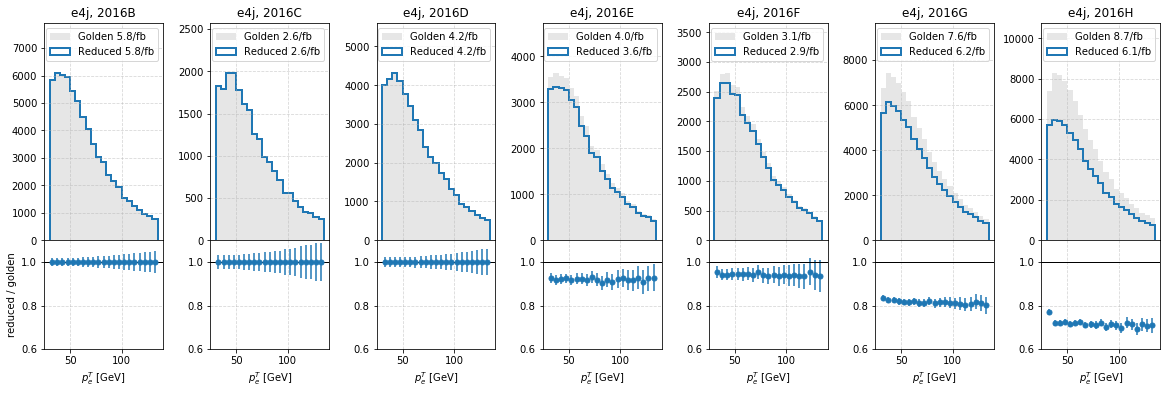

In [81]:
selection,nbjet = "e4j","==1"
golden,reduce = [],[]
for name in eranames:
    golden.append(DFCutter(selection, nbjet,'data2016'+name, folderOfPickles = "pickles").getDataFrame())
    reduce.append(DFCutter(selection, nbjet,'data2016'+name, folderOfPickles = "pickles_reduceEle27").getDataFrame())
plotCompare()

In [83]:
golden = DFCutter(selection, nbjet,'data2016', folderOfPickles = "pickles").getDataFrame()
reduce = DFCutter(selection, nbjet,'data2016', folderOfPickles = "pickles_reduceEle27").getDataFrame()
names = ['mcdiboson','mcz','mcw','mct','mctt']
mc = []
for name in names:
    temp = DFCutter(selection, nbjet,name).getDataFrame()
    mc.append(temp)
mc = pd.concat(mc)

# get fakes
golden_fakes = DFCutter(selection+'_fakes', nbjet,'data2016', folderOfPickles = "pickles").getDataFrame()
names = ['mcdiboson','mcz','mcw','mct','mctt']
mc_fakes  = []
for name in names:
    temp = DFCutter(selection+'_fakes', nbjet,name).getDataFrame()
    temp.eventWeight = -1*temp.eventWeight
    mc_fakes.append(temp)
mc_fakes  = pd.concat(mc_fakes)

fakes = pd.concat([golden_fakes,mc_fakes])
fakes.eventWeight = fakes.eventWeight *0.12

# add mc and fakes
totalmc = pd.concat([mc,fakes])

In [72]:

totalmc = mc

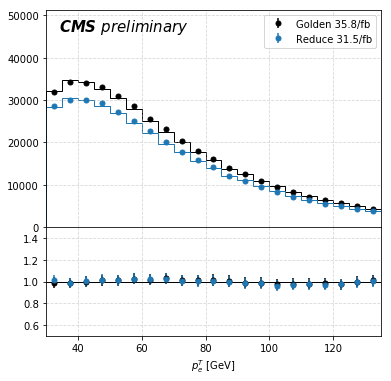

In [84]:
mybins = np.arange(30,140,5)
binsize = mybins[1] - mybins[0]
bincenters = mybins[0:-1] + binsize/2


fig, axes = plt.subplots(2, 1, sharex=True, facecolor='w',
                         gridspec_kw={'height_ratios':[2,1]},
                         figsize=(6,6))
fig.subplots_adjust(hspace=0)
    
ax = axes[0]
hmcgolden = ax.hist(totalmc.lepton1_pt, mybins, weights = totalmc.eventWeight, color='k',histtype='step',label=None)[0]
hmcreduce = ax.hist(totalmc.lepton1_pt, mybins, weights = 31.5/35.8*totalmc.eventWeight, color='C0', histtype='step',label=None)[0]

hgolden,_ = np.histogram(golden.lepton1_pt, mybins)
hreduce,_ = np.histogram(reduce.lepton1_pt, mybins)
ax.errorbar(bincenters, hgolden, yerr=hgolden**0.5, color='k',fmt='.', markersize=10,label="Golden 35.8/fb")
ax.errorbar(bincenters, hreduce, yerr=hreduce**0.5, color='C0',fmt='.', markersize=10,label="Reduce 31.5/fb")

ax.legend()
ax.grid(True,linestyle='--',alpha=0.5)
ax.set_ylim(0,1.5*hgolden.max())

ax.text(0.04*mybins.max()+0.96*mybins.min(), 1.35*hgolden.max(), 
        r'CMS $preliminary$',
        style='italic',fontsize='15',fontweight='bold')

ax = axes[1]

ratio = hgolden/hmcgolden
ratioVar = (1/hgolden + 0.05**2 )*ratio**2
ratioStd = ratioVar**0.5
ax.errorbar(bincenters, ratio, yerr=ratioStd, color='k',fmt='.',markersize=10)

ratio = hreduce/hmcreduce
ratioVar = (1/hreduce + 0.05**2 )*ratio**2
ratioStd = ratioVar**0.5
ax.errorbar(bincenters, ratio, yerr=ratioStd, color='C0',fmt='.',markersize=10)

ax.set_xlim(mybins.min(), mybins.max())
ax.axhline(1,lw=1,color='k')
ax.set_ylim((0.5,1.5))
ax.grid(True,linestyle='--',alpha=0.5)

baseDir = common.getBaseDirectory()
ax.set_xlabel(r'$p^T_e$ [GeV]')
plt.savefig(baseDir+'plots/datamc_comparing_'+selection+'.png',dpi=200)

In [38]:
h

array([31886, 34192, 34125, 33087, 30929, 28600, 25624, 23070, 20345,
       18067, 16104, 13896, 12476, 10818,  9528,  8270,  7248,  6372,
        5630,  5010,  4420])